# **Correlacion de Spearman**

06 de Noviembre 2025

In [10]:
# Sección 1: Importo módulos necesarios para la realización del test
import pandas as pd                 # Manipulación de datos
import numpy as np                  # Cálculos numéricos
import matplotlib.pyplot as plt     # Gráficos
from scipy.stats import spearmanr   # Test de correlación de Pearson

In [11]:
# Sección 2: Carga de base de datos

# Nombre del archivo CSV
pFile = "../data/SEMANA05_BASE08.csv"

# Importación del dataset
DATA = pd.read_csv(pFile, sep=';', decimal=',', header=0, na_values=[""])
DATA.T

,0,1,2,3,4,5,6,7,8,9
suelo,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Na,12.0,15.0,21.0,23.0,42.0,43.0,44.0,45.0,65.0,67.0
Ca,0.6,0.8,1.0,0.9,2.1,1.9,2.4,2.8,3.2,3.0


In [12]:
# Sección 3: Armo la base de datos final (sin datos faltantes)

# Columnas a utilizar
pos_X1, pos_X2 = 1, 2
idx = [pos_X1, pos_X2]

# Armo la base de datos
nDATA = DATA.iloc[:, idx].dropna()

# Verifico número de filas
print(f"Filas base de datos original:   {DATA.shape[0]}")
print(f"Filas base de datos modificada: {nDATA.shape[0]}")
nDATA.T

Filas base de datos original:   10
Filas base de datos modificada: 10


,0,1,2,3,4,5,6,7,8,9
Na,12.0,15.0,21.0,23.0,42.0,43.0,44.0,45.0,65.0,67.0
Ca,0.6,0.8,1.0,0.9,2.1,1.9,2.4,2.8,3.2,3.0


In [13]:
# Sección 4: Obtención de las variables a correlacionar

X1 = nDATA.iloc[:, 0]
X2 = nDATA.iloc[:, 1]

In [14]:
# Sección 5: Control de tipos de datos

# Verificación del tipo de dato: serie
print(f"La variable X1 es instancia de serie: {isinstance(X1, pd.Series)}")
print(f"La variable X2 es instancia de serie: {isinstance(X2, pd.Series)}")

# Verificación del tipo de dato: numérico
print(f"La variable X1 es numérica:           {np.issubdtype(X1.dtype, np.number)}")
print(f"La variable X2 es numérica:           {np.issubdtype(X2.dtype, np.number)}")

La variable X1 es instancia de serie: True
La variable X2 es instancia de serie: True
La variable X1 es numérica:           True
La variable X2 es numérica:           True


In [15]:
# Sección 6: Realización del Test de Correlación de Spearman

alpha = 0.05

coef, p_value = spearmanr(X1, X2, nan_policy='omit')
print(f"Coeficiente de correlación de Spearman: {coef:.4f}")
print(f"p-valor: {p_value:.4e}")

# Interpretación
if p_value < alpha:
    print("➡️ Se rechaza H0: Existe correlación significativa entre X1 y X2.")
else:
    print("➡️ No se rechaza H0.")

Coeficiente de correlación de Spearman: 0.9636
p-valor: 7.3210e-06
➡️ Se rechaza H0: Existe correlación significativa entre X1 y X2.


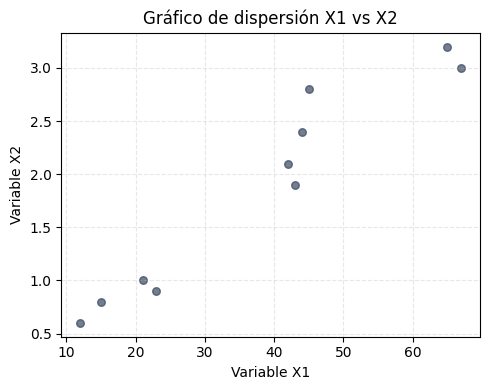

In [16]:
# Sección 7: Gráfico XY

plt.figure(figsize=(5, 4))
plt.scatter(X1, X2, color='#384860', alpha=0.7, edgecolor='#384860', s=30)
plt.xlabel("Variable X1", fontsize=10)
plt.ylabel("Variable X2", fontsize=10)
plt.title("Gráfico de dispersión X1 vs X2", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
# Sección 9: Generación de Tablas descriptivas

print("Cantidad de datos:", len(nDATA))

# Resumen medidas de posición X1
print("\nResumen X1:")
print(X1.describe())
# Resumen medidas de dispersión X1
print("Desviación estándar X1:", X1.std())
print("Varianza X1:", X1.var())

# Resumen medidas de posición X2
print("\nResumen X2:")
print(X2.describe())
# Resumen medidas de dispersión X2
print("Desviación estándar X2:", X2.std())
print("Varianza X2:", X2.var())

Cantidad de datos: 10

Resumen X1:
count    10.000000
mean     37.700000
std      19.476767
min      12.000000
25%      21.500000
50%      42.500000
75%      44.750000
max      67.000000
Name: Na, dtype: float64
Desviación estándar X1: 19.476766786210806
Varianza X1: 379.34444444444443

Resumen X2:
count    10.000000
mean      1.870000
std       0.983249
min       0.600000
25%       0.925000
50%       2.000000
75%       2.700000
max       3.200000
Name: Ca, dtype: float64
Desviación estándar X2: 0.9832485839185215
Varianza X2: 0.9667777777777778
